# dgesvd & dgemm scaling analysis

## Setup

In [8]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline
pd.set_option("display.max_rows", 16)

## Reading data

In [10]:
data = pd.read_excel('svd_benchmarks.xlsx', sheetname='scaling')

In [11]:
data

,cluster,size,nodes,threads,HFD5 read (s),dgesvd (s),dgemm 1 & 2 (s),dgesvd efficiency,dgemm efficiency
0,thinking,1000000,1,1,0.035760,1.0600,0.15690,1.000000,1.000000
1,thinking,1000000,1,2,0.008324,0.6931,0.08490,0.764680,0.924028
2,thinking,1000000,1,4,0.008809,0.5592,0.04438,0.473891,0.883844
3,thinking,1000000,1,8,0.008725,0.5016,0.02702,0.264155,0.725851
4,thinking,1000000,1,10,0.009160,0.4786,0.02243,0.221479,0.699510
5,thinking,1000000,1,16,0.008274,0.4590,0.01920,0.144336,0.510742
6,thinking,1000000,1,20,0.008693,0.7924,0.02680,0.066885,0.292724
7,thinking,4000000,1,1,0.324400,7.6620,2.17500,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
62,cerebro,4000000,1,20,0.105700,3.2600,0.47620,0.157975,0.224171


In [12]:
data.columns

Index(['cluster', 'size', 'nodes', 'threads', 'HFD5 read (s)', 'dgesvd (s)',
       'dgemm 1 & 2 (s)', 'dgesvd efficiency', 'dgemm efficiency'],
      dtype='object')

## dgesvd efficiency for thinking

In [13]:
thinking_svd = data[data['cluster'] == 'thinking'][['size', 'threads', 'dgesvd efficiency']].pivot_table(index='threads', columns=['size'])

In [14]:
thinking_svd

dgesvd efficiency                                        
size            1000000   4000000   16000000  64000000  256000000
threads                                                          
1                1.000000  1.000000  1.000000  1.000000  1.000000
2                0.764680  0.804325  0.864854  0.850775  0.847538
4                0.473891  0.632805  0.723230  0.753864  0.771552
8                0.264155  0.351468  0.461214  0.517282  0.552742
10               0.221479  0.329690  0.409448  0.437542  0.472495
16               0.144336  0.212079  0.272126  0.295027  0.319752
20               0.066885  0.130840  0.221433  0.236233  0.261451

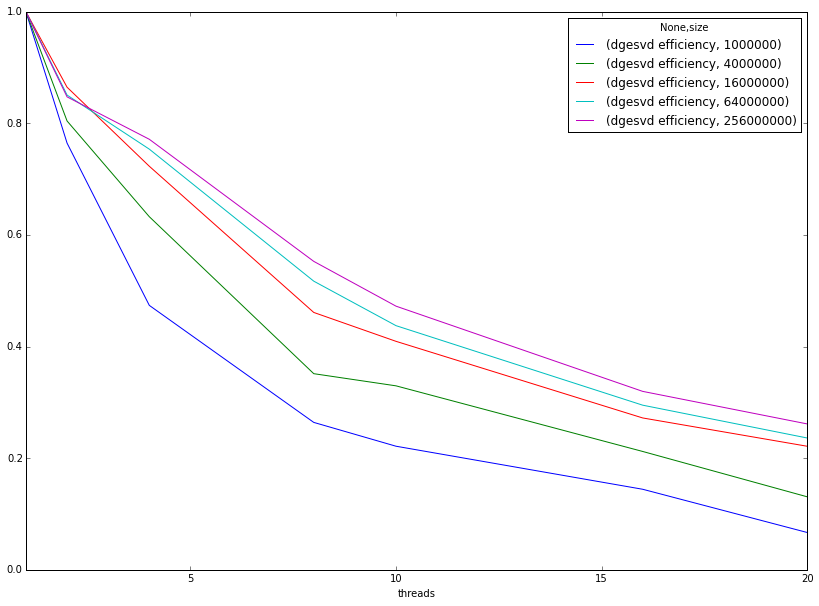

In [15]:
thinking_svd.plot(figsize=(14, 10));

## dgemm efficiency for thinking

In [16]:
thinking_dgemm = data[data['cluster'] == 'thinking'][['size', 'threads', 'dgemm efficiency']].pivot_table(index='threads', columns=['size'])

In [17]:
thinking_dgemm

dgemm efficiency                                        
size           1000000   4000000   16000000  64000000  256000000
threads                                                         
1               1.000000  1.000000  1.000000  1.000000  1.000000
2               0.924028  0.687421  0.852522  0.969508  0.988084
4               0.883844  1.031980  0.845172  0.911588  0.955938
8               0.725851  0.269985  0.656049  0.848103  0.896581
10              0.699510  0.444331  0.581495  0.790492  0.859435
16              0.510742  0.317314  0.448244  0.779353  0.839761
20              0.292724  0.117238  0.617769  0.705833  0.814890

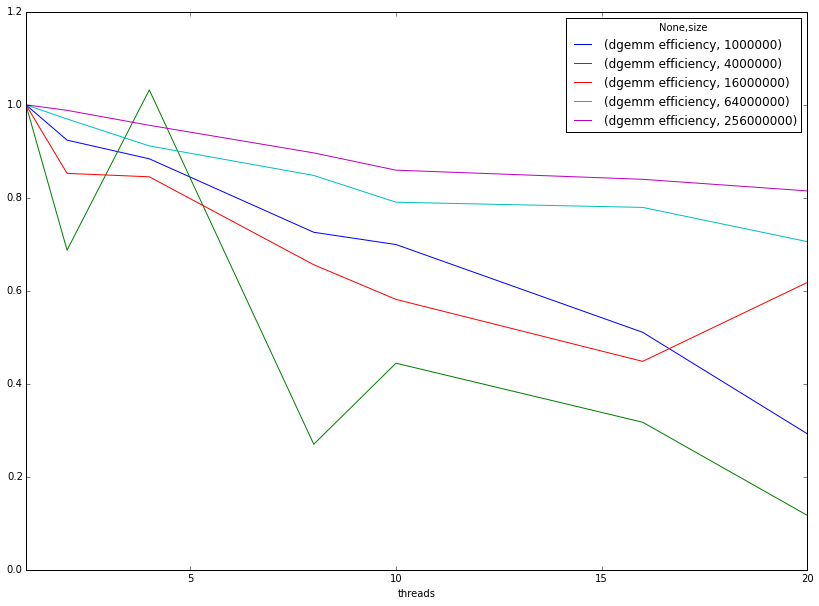

In [18]:
thinking_dgemm.plot(figsize=(14, 10));

## dgesvd scaling on thinking

In [19]:
dgesvd_thinking = data[((data['cluster'] == 'thinking') & (data['threads'] == 1))][['size', 'dgesvd (s)']]

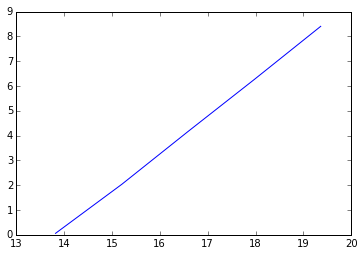

In [20]:
plt.plot(np.log(dgesvd_thinking['size']), np.log(dgesvd_thinking['dgesvd (s)']));

In [21]:
slope, intercept, *_ = stats.linregress(np.log(np.sqrt(dgesvd_thinking['size'])), np.log(dgesvd_thinking['dgesvd (s)']))
slope, intercept

(3.0190605914108359, -20.85316351931348)

## dgemm scaling on thinking

In [22]:
dgemm_thinking = data[((data['cluster'] == 'thinking') & (data['threads'] == 1))][['size', 'dgemm 1 & 2 (s)']]

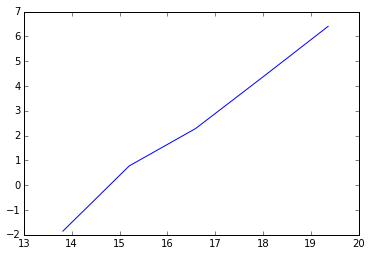

In [23]:
plt.plot(np.log(dgemm_thinking['size']), np.log(dgemm_thinking['dgemm 1 & 2 (s)']));

In [24]:
slope, intercept, *_ = stats.linregress(np.log(np.sqrt(dgemm_thinking['size'])), np.log(dgemm_thinking['dgemm 1 & 2 (s)']))
slope, intercept

(2.895390083850593, -21.625709389607451)

## dgesvd efficiency for cerebro

In [25]:
cerebro_svd = data[data['cluster'] == 'cerebro'][['size', 'threads', 'dgesvd efficiency']].pivot_table(index='threads', columns=['size'])

In [26]:
cerebro_svd

dgesvd efficiency                                        
size            1000000   4000000   16000000  64000000  256000000
threads                                                          
1                1.000000  1.000000  1.000000  1.000000  1.000000
2                0.857605  0.897682  0.940749  0.935974  0.852522
4                0.601518  0.685935  0.769117  0.810888  0.845172
8                0.299914  0.447359  0.522177  0.560050  0.656049
10               0.236972  0.388386  0.446552  0.483538  0.581495
16               0.124740  0.188562  0.225512  0.205586  0.448244
20               0.112387  0.157975  0.156083  0.131837  0.617769

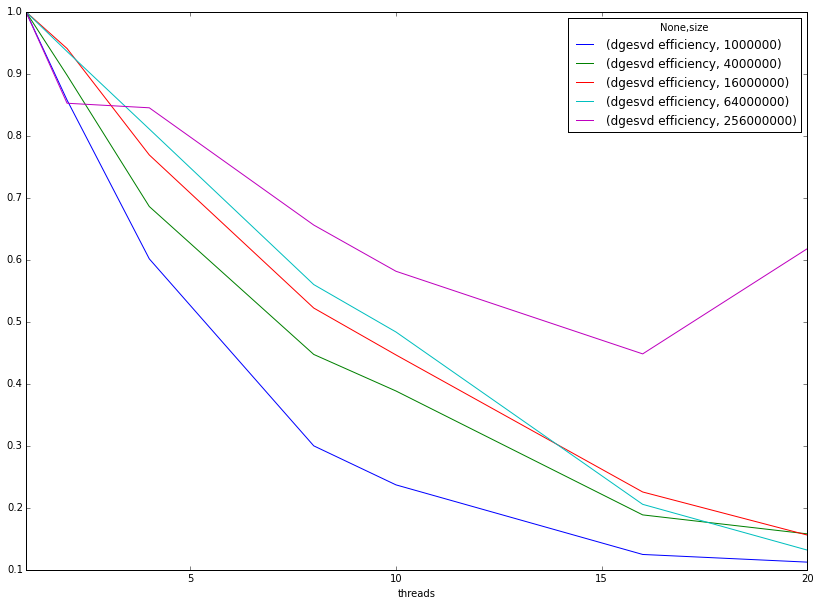

In [34]:
cerebro_svd.plot(figsize=(14,10));

## dgemm efficiency for cerebro

In [28]:
cerebro_dgemm = data[data['cluster'] == 'cerebro'][['size', 'threads', 'dgemm efficiency']].pivot_table(index='threads', columns=['size'])

In [29]:
cerebro_dgemm

dgemm efficiency                                        
size           1000000   4000000   16000000  64000000  256000000
threads                                                         
1               1.000000  1.000000  1.000000  1.000000  1.000000
2               0.966024  0.875718  0.941152  0.981655  0.578132
4               0.904868  1.165902  0.990370  0.961759  0.345671
8               0.716817  0.527525  0.820044  0.954822  0.271024
10              0.689610  0.243721  0.933008  0.912886  0.244231
16              0.371364  0.407318  0.413881  0.793676  0.229673
20              0.321319  0.224171  0.430735  0.610067  0.225801

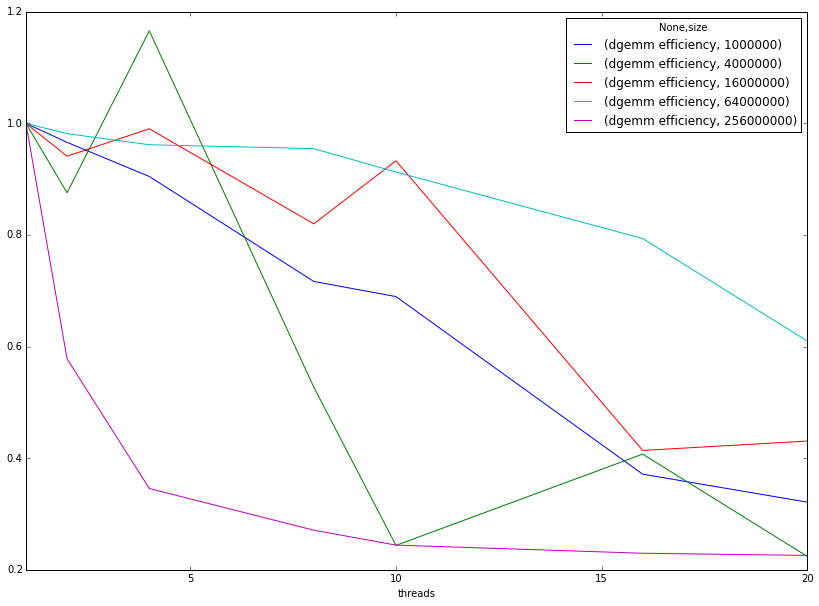

In [30]:
cerebro_dgemm.plot(figsize=(14,10));